In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import matplotlib.pyplot as plot
import numpy as np
import time as tm

In [60]:
import csv

def write_data_csv(filename,head,data):
    with open(filename, 'w', newline='') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',')
        spamwriter.writerow(head)
        spamwriter.writerows(data.T.tolist())

Measurement no. 1
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 600000


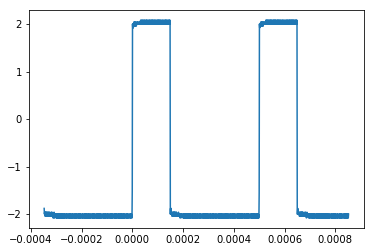

Measurement no. 2
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 600000


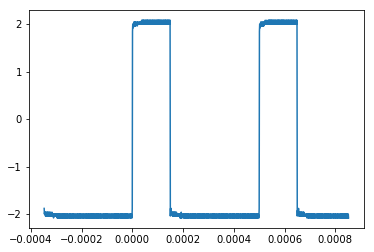

Measurement no. 3
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 600000


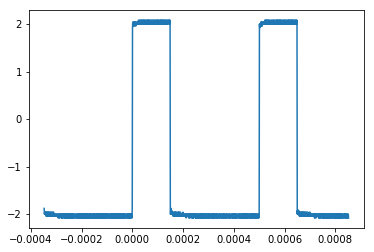

Measurement no. 4
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 600000


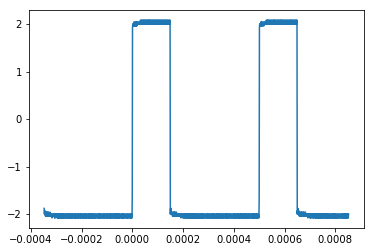

Measurement no. 5
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 600000


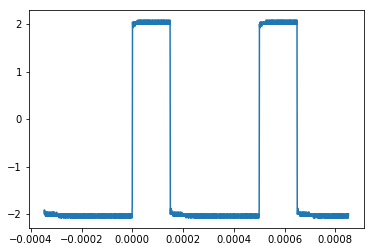

Measurement no. 6
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 600000


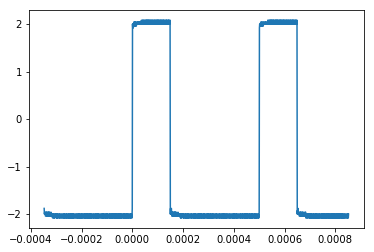

Measurement no. 7
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 600000


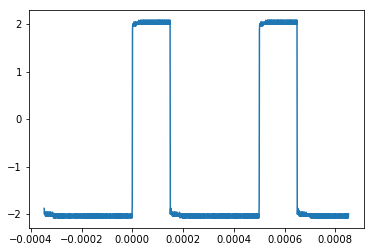

Measurement no. 8
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 600000


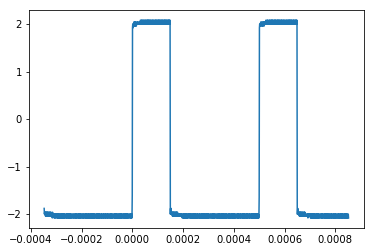

Measurement no. 9
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 600000


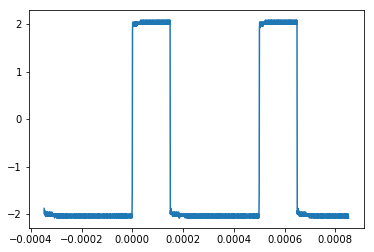

Measurement no. 10
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 600000


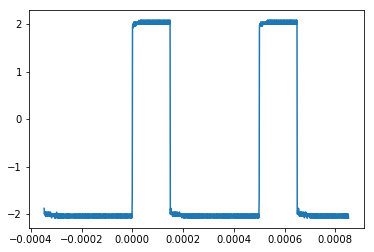

Save measurement to file: "trace_2018-04-09_17-31-15_ch2_N10.csv"


In [65]:
import rigol_plot as rigol

avg_cnt = 10
channel = 2
adr = u'USB0::0x1AB1::0x04CE::DS1ZA170300751::INSTR'
filename = './data/trace_'+tm.strftime("%Y-%m-%d_%H-%M-%S", tm.gmtime())+'_ch'+str(channel)+'_N'+str(avg_cnt)+'.csv'

acc_data = list()
head = [('time')]

for x in range(1,avg_cnt+1):
    print('Measurement no. '+str(x))
    head += [('M'+str(x))]
    time, data = rigol.read(adr,channel)
    acc_data.append(data)
    plot.plot(time, data)
    plot.show()
    
new_data = acc_data
new_data.insert(0,time)
new_data = np.matrix(new_data)

print('Save measurement to file: "'+filename+'"')
write_data_csv(filename,head,new_data)

In [66]:
data_avg = np.array(np.zeros(new_data.shape[1]))
for data in acc_data:
    data_avg += np.asarray(data)
data_avg = data_avg/avg_cnt

data_std = np.array(np.zeros(new_data.shape[1]))
for data in acc_data:
    data_std += np.square(np.asarray(data)-data_avg)
data_std = np.sqrt(data_std/avg_cnt)

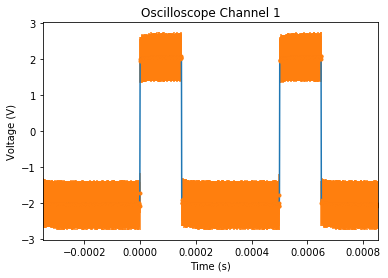

In [67]:
x = time
y = data_avg
err = data_std

plot.plot(x,y)

plot.errorbar(x, y, yerr=err, fmt='.')
plot.title("Oscilloscope Channel 1")
plot.ylabel("Voltage (V)")
plot.xlabel("Time (s)")
plot.xlim(time[0], time[-1])
plot.show()